### Import

In [1]:
import networkx as nx
from node2vec import Node2Vec
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, accuracy_score
import seaborn as sns

In [2]:
months = ['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30']
graphs = []

for month in months:
    with open(f'../data/graphs/graph_{month}.pkl', 'rb') as f:
        g = pickle.load(f)
        graphs.append(g)
        print(f'For {month}: {g.edges}')

For 2015-01-31: [('AFG', 'PAK'), ('AFG', 'USA'), ('AFR', 'BDI'), ('AFR', 'DJI'), ('AFR', 'NGA'), ('AFR', 'SDN'), ('AFR', 'SOM'), ('AFR', 'USA'), ('AFR', 'ZAF'), ('ARE', 'AUS'), ('ARE', 'BHR'), ('ARM', 'BGR'), ('AUS', 'USA'), ('BFA', 'CIV'), ('BGD', 'IND'), ('BGD', 'USA'), ('BGR', 'FRA'), ('BLR', 'USA'), ('BLZ', 'ESP'), ('BLZ', 'USA'), ('BRA', 'IDN'), ('CAN', 'CHN'), ('CAN', 'SAU'), ('CAN', 'SEA'), ('CAN', 'UKR'), ('CAN', 'USA'), ('CHE', 'SGP'), ('CHE', 'USA'), ('CHL', 'USA'), ('CHN', 'CMR'), ('CHN', 'COL'), ('CHN', 'EGY'), ('CHN', 'JPN'), ('CHN', 'KOR'), ('CHN', 'PAK'), ('CHN', 'RUS'), ('CHN', 'SEA'), ('CHN', 'TWN'), ('CHN', 'USA'), ('COD', 'COG'), ('COD', 'USA'), ('COK', 'USA'), ('COL', 'USA'), ('CUB', 'FRA'), ('CUB', 'NMR'), ('CUB', 'USA'), ('CUB', 'ZAF'), ('DEU', 'EUR'), ('DEU', 'MDV'), ('DEU', 'POL'), ('DEU', 'RUS'), ('DEU', 'SGP'), ('DEU', 'SYR'), ('DEU', 'USA'), ('ECU', 'SWE'), ('EGY', 'GMB'), ('EGY', 'MYS'), ('EGY', 'USA'), ('ERI', 'ISR'), ('ESP', 'KOR'), ('ESP', 'USA'), ('ESP',

In [3]:
graphs

In [4]:
january_node2vec = Node2Vec(graphs[0], dimensions=64, walk_length=30, num_walks=100, workers=4)
january_model = january_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

In [5]:
february_node2vec = Node2Vec(graphs[1], dimensions=64, walk_length=30, num_walks=100, workers=4)
february_model = february_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

In [6]:
march_node2vec = Node2Vec(graphs[2], dimensions=64, walk_length=30, num_walks=100, workers=4)
march_model = march_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

In [7]:
april_node2vec = Node2Vec(graphs[3], dimensions=64, walk_length=30, num_walks=100, workers=4)
april_model = april_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

In [8]:
print(len(graphs[0].nodes) == len(graphs[1].nodes) == len(graphs[2].nodes) == len(graphs[3].nodes))

True


In [9]:
ser1 = pd.Series([n for n in graphs[0].nodes])
ser2 = pd.Series([n for n in graphs[1].nodes])
ser3 = pd.Series([n for n in graphs[2].nodes])
ser4 = pd.Series([n for n in graphs[3].nodes])
intersection_set = set(ser1).intersection(set(ser2)).intersection(set(ser3)).intersection(set(ser4))

In [10]:
intersection_set

{'ABW',
 'AFG',
 'AFR',
 'AGO',
 'AIA',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ASA',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CAS',
 'CAU',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COK',
 'COL',
 'COM',
 'CPV',
 'CRB',
 'CRI',
 'CUB',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'EAF',
 'ECU',
 'EGY',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'EUR',
 'FIN',
 'FJI',
 'FRA',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GTM',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAM',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MCO',
 'MDA',
 'MDG',
 'MDV',


In [21]:
avg_vectors = dict()
for node in graphs[3].nodes:
    avg_vector = []
    for i in range(64):
        avg_vector.append((january_model.wv[node][i] + february_model.wv[node][i] + march_model.wv[node][i] + april_model.wv[node][i]) / 4)
    avg_vectors[node] = avg_vector

In [23]:
graphs[0].nodes


NodeView(('ABW', 'AFG', 'AFR', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASA', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CAS', 'CAU', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRB', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAF', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'EUR', 'FIN', 'FJI', 'FRA', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAM', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEA', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAF', 'NAM', 'NER', 'NG

In [24]:
january_model.wv['USA']

array([ 0.00828752,  0.01315569,  0.55301344, -0.04021676,  0.0696208 ,
        0.00799211,  0.00976   ,  0.0642284 ,  0.05233241,  0.13487925,
        0.08630358, -0.05999166,  0.05843126,  0.09306679, -0.17713633,
       -0.35356942, -0.1800762 ,  0.15765697,  0.1727092 , -0.27393258,
        0.6827198 , -0.12797059,  0.2623304 , -0.33955932, -0.20288375,
        0.01500307, -0.17970568,  0.2564145 , -0.04663472,  0.2810967 ,
       -0.13015555,  0.03704587, -0.03237618,  0.04969577,  0.03660786,
       -0.4910896 ,  0.08536867,  0.26296163,  0.20538288, -0.06922319,
        0.20079269,  0.29487336, -0.54282   , -0.1380859 , -0.18096942,
        0.1955147 ,  0.2032576 , -0.59984356, -0.45741364, -0.31132853,
        0.23984344,  0.24379209, -0.21080905,  0.27833554,  0.4114969 ,
        0.05888148, -0.04200342,  0.26780573, -0.26378232,  0.2127722 ,
        0.17682372, -0.2989863 ,  0.4876702 ,  0.23497696], dtype=float32)

In [25]:
len(avg_vectors['USA'])

64

### Scalar product of two vectors for link prediction

In [26]:
dot_products = dict()
for node1 in avg_vectors:
    for node2 in avg_vectors:
        if node1 != node2:
            vector1 = np.array(avg_vectors[node1])
            vector2 = np.array(avg_vectors[node2])
            n_sorted = sorted([node1, node2])
            dot_products[f'{n_sorted[0]}-{n_sorted[1]}'] = np.dot(vector1, vector2)

In [27]:
dot_products

{'ABW-AFG': -0.00013625523667078632,
 'ABW-AFR': -0.0040249948038871605,
 'ABW-AGO': 0.003205887222753277,
 'ABW-AIA': 0.0009047425682298078,
 'ABW-ALB': 0.004488272239314745,
 'ABW-AND': 0.005150029299749512,
 'ABW-ARE': 0.003135120962549331,
 'ABW-ARG': -0.004432952663965082,
 'ABW-ARM': 0.004372739216360366,
 'ABW-ASA': -0.002299858806365254,
 'ABW-ATG': 0.0040438144154314746,
 'ABW-AUS': 0.005435104974449436,
 'ABW-AUT': -0.00102364570088139,
 'ABW-AZE': 0.00078945509654172,
 'ABW-BDI': -0.007236026035210023,
 'ABW-BEL': 0.00023938906036413818,
 'ABW-BEN': -0.0021008996155283625,
 'ABW-BFA': -0.01095041082731006,
 'ABW-BGD': 0.0029426174693660424,
 'ABW-BGR': 0.00621091388659402,
 'ABW-BHR': 0.004972748207535115,
 'ABW-BHS': 0.000982581412215841,
 'ABW-BLR': 0.0016217131383154397,
 'ABW-BLZ': 0.0010055852327376467,
 'ABW-BMU': -0.00015046296374548107,
 'ABW-BOL': -0.0013080755223319382,
 'ABW-BRA': -0.004445831846224662,
 'ABW-BRB': 0.0030054785016781554,
 'ABW-BRN': 0.005777778688

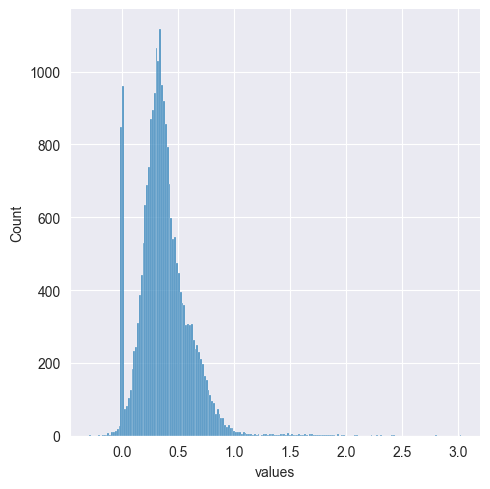

In [28]:
sns.displot(pd.DataFrame({'values':dot_products.values()}), x='values')

### Testing with different values of threshold

In [18]:
with open(f'../data/graphs/graph_2015-05-31.pkl', 'rb') as f:
        g = pickle.load(f)
        graphs.append(g)
        print(g.edges(data=True))

[('ABW', 'NLD', {'weight': 0.32994957983193246}), ('ABW', 'USA', {'weight': 5.517460317460318}), ('AFG', 'ARE', {'weight': -7.074291938997822}), ('AFG', 'AUS', {'weight': -2.72696614925925}), ('AFG', 'BRA', {'weight': -7.4195652173913045}), ('AFG', 'CAN', {'weight': 0.3140187736037181}), ('AFG', 'CAS', {'weight': 5.007946154621764}), ('AFG', 'CHN', {'weight': 1.4252879298751775}), ('AFG', 'DEU', {'weight': 2.729558020672221}), ('AFG', 'EGY', {'weight': -1.7264969559745413}), ('AFG', 'EUR', {'weight': -5.204718808983901}), ('AFG', 'FRA', {'weight': -2.489670234468934}), ('AFG', 'GBR', {'weight': -5.47716092757292}), ('AFG', 'HRV', {'weight': 1.611537308042588}), ('AFG', 'IDN', {'weight': 0.38000000000000006}), ('AFG', 'IND', {'weight': 1.3917199017199018}), ('AFG', 'IRN', {'weight': 0.08018590996540487}), ('AFG', 'ITA', {'weight': 1.251977401129944}), ('AFG', 'JOR', {'weight': 1.664864864864866}), ('AFG', 'JPN', {'weight': -8.0}), ('AFG', 'KAZ', {'weight': 1.2743687280737526}), ('AFG', 

In [41]:
actual_and_predicted_values = dict()
for edge in g.edges(data=True):
    node1, node2 = edge[0], edge[1]
    n_sorted = sorted([node1, node2])
    e = f'{n_sorted[0]}-{n_sorted[1]}'
    if e in dot_products:
        threshold = 0.1
        actual_and_predicted_values[e] = (1 if edge[2]['weight'] >= 0 else 0, 1 if dot_products[e] > threshold else 0)

In [42]:
actual = [el[0] for el in actual_and_predicted_values.values()]
predicted = [el[1] for el in actual_and_predicted_values.values()]
recall = recall_score(actual, predicted)
acc = accuracy_score(actual, predicted)
print('Recall:', recall, 'Accuracy:', acc)

Recall: 0.9957081545064378 Accuracy: 0.7535468179975678


In [43]:
print(len(actual))

2467


In [44]:
print(len([el for el in actual if el == 0]))
print(len([el for el in actual if el == 1]))


603
1864


In [45]:
print(len([el for el in predicted if el == 0]))
print(len([el for el in predicted if el == 1]))

11
2456
